<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge : Réduisez les tous : ACP !

Dans ce challenge, tu vas repartir du dataset de la météo.

Crée-toi un notebook et réalise les tâches ci-dessous. Une fois terminé, mets en commentaire le lien de ton notebook consultable N'oublie pas d'effectuer des visualisations et de commenter ton code, toujours utiles pour comprendre un dataset.

---
---

__imports__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

---
---

1. Charge le dataset et mène une analyse exploratoire : le nombre de features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...

In [ ]:
link_file = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"

df = pd.read_csv(link_file)

In [ ]:
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,1029,85.750,11,10,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,1029,95.125,12,9,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,1032,77.000,12,10,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,1038,12.375,9,6,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,1038,18.625,9,5,3,116,116,116,0,1,8.7,very bad,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [ ]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,50.017760,17.311475,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,28.935057,6.688467,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,0.000000,5.000000,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,24.750000,12.000000,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,53.937500,16.000000,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,74.000000,23.000000,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,100.000000,38.000000,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


---
---

2. Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.

In [ ]:
X = df.select_dtypes(include='number')
y = df['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

---
---

3. Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans X_scaled, qui doit également avoir 366 lignes et 22 colonnes.

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---

4. Instancie un objet pca, et entraine-le sur tes données standardisées.

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

---
---

5. Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?

In [ ]:
variances = list(pca.explained_variance_ratio_)
print(variances)

[0.41223646483694243, 0.2127254584150339, 0.06491128563913613, 0.056026290511560425, 0.04635350939968853, 0.037140259433066536, 0.03060941255753979, 0.02855313893182027, 0.025319913915389083, 0.020610906493226458, 0.02034340515890583, 0.01666461334939286, 0.010679838428745848, 0.005210671830149369, 0.004941005943175691, 0.0035931859345929586, 0.002249535432070824, 0.0007802537205543961, 0.0005391796494507392, 0.0003522296582103952, 0.00015944076134758234, 6.58583863678079e-19]


In [ ]:
def n_components_for(variances: list, variance: float) -> int:
    variances_list = []

    for i in range(0, len(variances)+1):

        if len(variances) > 0:
            max_var = max(variances)
            variances_list.append(max_var)
            variances.remove(max_var)

        if sum(variances_list) >= variance/100:
            break

    return len(variances_list)

In [ ]:
print(f"For 70% of the variance : {n_components_for(variances, 70)}")
print(f"For 80% of the variance : {n_components_for(variances, 80)}")

For 70% of the variance : 4
For 80% of the variance : 18


---
---

6. Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION.

In [ ]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

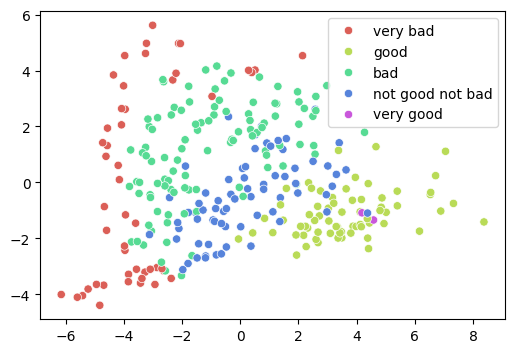

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='hls', ax=ax)

ax.legend()
fig.show()

---
---

7. Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?

In [ ]:
def get_score(X_train, X_test, y_train, y_test):
    modelKNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
    modelKNN.fit(X_train, y_train)

    y_train_predict = modelKNN.predict(X_train)
    y_test_predict = modelKNN.predict(X_test)

    train_score = accuracy_score(y_train, y_train_predict)
    test_score = accuracy_score(y_test, y_test_predict)

    print(f"Score train set : {train_score}")
    print(f"Score test set : {test_score}")


In [ ]:
print("------------ X SCALED ------------------")
get_score(X_train_scaled, X_test_scaled, y_train, y_test)
print()

print("------------ X SCALED PCA ------------------")
get_score(X_train_pca[:,0:2], X_test_scaled[:,0:2], y_train, y_test)
print()

------------ X SCALED ------------------
Score train set : 1.0
Score test set : 0.7837837837837838

------------ X SCALED PCA ------------------
Score train set : 1.0
Score test set : 0.1891891891891892



---
---